## Find the common columns (across 3 years) and Oversampling Using SMOTE

- Some variables across different years may not have consistency (e.g., frequency in the past month/last 6 months), so we will make adjustments for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import json
from imblearn.over_sampling import SMOTE
import seaborn as sns

## List of Variables

In [2]:
variables_data = {"Variable": ["HHFAMINC", "WRKCOUNT", "R_AGE", "URBRUR", "DRIVER", "TRIPPURP", "WHYTRP1S", "WHYFROM", "WHYTO", "CNTTDTR", "CARSHARE", "TRAIN", "BIKE", "NBIKETRP", "BUS", "NWALKTRP", "NBIKETRP", "CAR", "WRKTRANS", "USULDRV", "TIMETOWK", "GCDWORK", "DISTTOWK", "DISTTOWK17", "WKFMHMXX", "DISTTOSC", "DISTTOSC17", "GRADE", "TIMETOSC", "SCHTRN1", "SCHTRN2", "WEBUSE17", "WEBUSE", "PURCHASE", "DELIVER"],
                  "Description": ["Household income", "Number of workers in household", "Respondent Age", "Household in urban/rural area", "Driver status, derived", "General Trip Purpose (Home-Based Purpose types)", "Trip purpose summary", "Trip purpose for previous trip", "Travel day purpose of trip", "Count of travel day trips for this respondent", "Count of Car Share Program Usage", "Frequency of Train Use for Travel", "Frequency of Bicycle Use for Travel", "No. of bike trips in past week", "Frequency of Bus Use for Travel", "Number of walk trips in past week", "Number of bike trips in past week", "Frequency of Personal Vehicle Use for Travel", "Transportation mode to work last week", "Usually drive alone or carpool to work", "Trip Time to Work in Minutes", "Great circle distance (miles) between home and work", "One-way distance to workplace (miles)", "Road network distance, in miles, between respondent's home location and work location", "How often worked from home", "Distance home to school", "Road network distance, in miles, between respondent's home location and school location", "Grade allowed to walk/bike to/from school without adult", "Minutes to get to school", "Mode to school", "Mode from school", "Frequency of internet use", "Frequency of Internet use in ...", "Number of times purchased via internet in the past month", "Count of Times Purchased Online for Delivery in Last 30 Days"]}

variables_df = pd.DataFrame(variables_data)

# Print the DataFrame
variables_df


,Variable,Description
0,HHFAMINC,Household income
1,WRKCOUNT,Number of workers in household
2,R_AGE,Respondent Age
3,URBRUR,Household in urban/rural area
4,DRIVER,"Driver status, derived"
5,TRIPPURP,General Trip Purpose (Home-Based Purpose types)
6,WHYTRP1S,Trip purpose summary
7,WHYFROM,Trip purpose for previous trip
8,WHYTO,Travel day purpose of trip
9,CNTTDTR,Count of travel day trips for this respondent


### 1) Reading Data and Finding Common Columns

In [3]:
# Create empty DataFrames for each year
df_2001 = pd.read_csv("FL2001.csv")
df_2009 = pd.read_csv("FL2009.csv")
df_2017 = pd.read_csv("FL2017.csv")

In [4]:
# WEBUSE17 and WEBUSE are the same thing, so we change the column name
df_2017.rename(columns={'WEBUSE17': 'WEBUSE'}, inplace=True)

In [5]:
df_2001_all = df_2001.copy()
df_2009_all = df_2009.copy()
df_2017_all = df_2017.copy()

In [6]:
# Lists of the column names for each year
col_name_2001 = list(df_2001.columns)
col_name_2009 = list(df_2009.columns)
col_name_2017 = list(df_2017.columns)

In [7]:
print("For, 2001 there're", len(col_name_2001), "columns, which are:", "\n" , col_name_2001)
print("For, 2009 there're", len(col_name_2009), "columns, which are:", "\n" , col_name_2009)
print("For, 2017 there're", len(col_name_2017), "columns, which are:", "\n" , col_name_2017)

For, 2001 there're 23 columns, which are: 
 ['HOUSEID', 'PERSONID', 'URBRUR', 'WHYFROM', 'DRIVER', 'WHYTO', 'WHYTRP1S', 'HHFAMINC', 'TRIPPURP', 'WRKCOUNT', 'R_AGE', 'USULDRV', 'WEBUSE', 'WKFMHMXX', 'WRKTRANS', 'GCDWORK', 'CNTTDTR', 'NWALKTRP', 'NBIKETRP', 'DISTTOWK', 'TIMETOWK', 'HHSIZE', 'HHFAMINC2']
For, 2009 there're 29 columns, which are: 
 ['HOUSEID', 'PERSONID', 'DRIVER', 'HHFAMINC', 'TRIPPURP', 'R_AGE', 'URBRUR', 'WHYFROM', 'WHYTO', 'WHYTRP1S', 'WRKCOUNT', 'CNTTDTR', 'DELIVER', 'DISTTOSC', 'GCDWORK', 'GRADE', 'NBIKETRP', 'NWALKTRP', 'PURCHASE', 'SCHTRN1', 'SCHTRN2', 'TIMETOSC', 'TIMETOWK', 'WEBUSE', 'WKFMHMXX', 'WRKTRANS', 'DISTTOWK', 'HHSIZE', 'HHFAMINC2']
For, 2017 there're 32 columns, which are: 
 ['HOUSEID', 'PERSONID', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTO', 'HHFAMINC', 'WRKCOUNT', 'URBRUR', 'R_AGE', 'DRIVER', 'WRKTRANS', 'NWALKTRP', 'NBIKETRP', 'CARSHARE', 'TIMETOWK', 'WKFMHMXX', 'SCHTRN1', 'SCHTRN2', 'DELIVER', 'CNTTDTR', 'GCDWORK', 'DISTTOWK17', 'DISTTOSC17', 'BIKE',

In [8]:
# Find the common column names
common_column_names = list(set(col_name_2001) & set(col_name_2009) & set(col_name_2017))

In [9]:
# Print the column names for the common column names
print("Common column names:", common_column_names)
print("Number of common columns:", len(common_column_names))

Common column names: ['WRKCOUNT', 'TRIPPURP', 'HHSIZE', 'NWALKTRP', 'HHFAMINC2', 'TIMETOWK', 'WHYFROM', 'WKFMHMXX', 'WEBUSE', 'WHYTRP1S', 'WRKTRANS', 'WHYTO', 'HOUSEID', 'URBRUR', 'DRIVER', 'NBIKETRP', 'HHFAMINC', 'R_AGE', 'PERSONID', 'CNTTDTR', 'GCDWORK']
Number of common columns: 21


In [10]:
# Find column names that are not in common_column_names for each year
not_in_common_2001 = list(set(col_name_2001) - set(common_column_names))
not_in_common_2009 = list(set(col_name_2009) - set(common_column_names))
not_in_common_2017 = list(set(col_name_2017) - set(common_column_names))

print("Column names not in common for 2001:", not_in_common_2001)
print("Column names not in common for 2009:", not_in_common_2009)
print("Column names not in common for 2017:", not_in_common_2017)

Column names not in common for 2001: ['USULDRV', 'DISTTOWK']
Column names not in common for 2009: ['PURCHASE', 'SCHTRN1', 'SCHTRN2', 'DISTTOSC', 'GRADE', 'TIMETOSC', 'DELIVER', 'DISTTOWK']
Column names not in common for 2017: ['CAR', 'TRAIN', 'SCHTRN1', 'SCHTRN2', 'DISTTOWK17', 'BIKE', 'BUS', 'DELIVER', 'DISTTOSC17', 'CARSHARE']


### 2) Creating DataFrames with Common Columns

In [11]:
# Filter DataFrames to keep only the common columns
df_2001 = df_2001[common_column_names]
df_2009 = df_2009[common_column_names]
df_2017 = df_2017[common_column_names]

In [12]:
df_2001.head()

,WRKCOUNT,TRIPPURP,HHSIZE,NWALKTRP,HHFAMINC2,TIMETOWK,WHYFROM,WKFMHMXX,WEBUSE,WHYTRP1S,...,WHYTO,HOUSEID,URBRUR,DRIVER,NBIKETRP,HHFAMINC,R_AGE,PERSONID,CNTTDTR,GCDWORK
0,1,HBSHOP,1,20,VeryLow,15,Home,Skip,Skip,EatMeal,...,GetMeal,10000045,Urban,Yes,0,15K-20K,55,1,5,2
1,1,NHB,1,20,VeryLow,15,GetMeal,Skip,Skip,Family,...,BuyService,10000045,Urban,Yes,0,15K-20K,55,1,5,2
2,1,NHB,1,20,VeryLow,15,BuyService,Skip,Skip,ToWork,...,GoToWork,10000045,Urban,Yes,0,15K-20K,55,1,5,2
3,1,NHB,1,20,VeryLow,15,GoToWork,Skip,Skip,EatMeal,...,GetMeal,10000045,Urban,Yes,0,15K-20K,55,1,5,2
4,1,HBSHOP,1,20,VeryLow,15,GetMeal,Skip,Skip,ReturnHome,...,Home,10000045,Urban,Yes,0,15K-20K,55,1,5,2


In [13]:
df_2009[:5]

,WRKCOUNT,TRIPPURP,HHSIZE,NWALKTRP,HHFAMINC2,TIMETOWK,WHYFROM,WKFMHMXX,WEBUSE,WHYTRP1S,...,WHYTO,HOUSEID,URBRUR,DRIVER,NBIKETRP,HHFAMINC,R_AGE,PERSONID,CNTTDTR,GCDWORK
0,0,-9,2,0,High,-1,NotAscertained,-1,Never,SocialRecreation,...,Skip,20005517,Urban,Yes,0,75K-80K,79,1,1,-1.0
1,0,HBSHOP,2,15,VeryLow,-1,Home,-1,AlmostEveryday,Shopping,...,BuyGas,20012467,Urban,Yes,5,20K-25K,38,1,5,-1.0
2,0,HBSHOP,2,15,VeryLow,-1,BuyGas,-1,AlmostEveryday,Home,...,Home,20012467,Urban,Yes,5,20K-25K,38,1,5,-1.0
3,0,HBO,2,15,VeryLow,-1,Home,-1,AlmostEveryday,TransportSomeone,...,PickUpSomeone,20012467,Urban,Yes,5,20K-25K,38,1,5,-1.0
4,0,NHB,2,15,VeryLow,-1,PickUpSomeone,-1,AlmostEveryday,TransportSomeone,...,DropSomeoneOff,20012467,Urban,Yes,5,20K-25K,38,1,5,-1.0


In [14]:
df_2017[:5]

,WRKCOUNT,TRIPPURP,HHSIZE,NWALKTRP,HHFAMINC2,TIMETOWK,WHYFROM,WKFMHMXX,WEBUSE,WEBUSE,...,WHYTO,HOUSEID,URBRUR,DRIVER,NBIKETRP,HHFAMINC,R_AGE,PERSONID,CNTTDTR,GCDWORK
0,0,HBSOCREC,2,5,Low,-1,Home,-1,1,Daily,...,VisitFriends,30000931,Urban,Yes,0,35K-50K,69,1,4,-9.0
1,0,NHB,2,5,Low,-1,VisitFriends,-1,1,Daily,...,Errands,30000931,Urban,Yes,0,35K-50K,69,1,4,-9.0
2,0,NHB,2,5,Low,-1,Errands,-1,1,Daily,...,BuyGoods,30000931,Urban,Yes,0,35K-50K,69,1,4,-9.0
3,0,HBSHOP,2,5,Low,-1,BuyGoods,-1,1,Daily,...,Home,30000931,Urban,Yes,0,35K-50K,69,1,4,-9.0
4,0,HBSHOP,2,6,Low,-1,Home,-1,1,Daily,...,BuyGoods,30000931,Urban,Yes,0,35K-50K,68,2,6,-9.0


### 3) Variable Consistency Adjustment

<img src="https://drive.google.com/uc?id=191tQnPRPQUlNGeBEFS4_2vVgNjYGpZww">


<img src="https://drive.google.com/uc?id=1Cd3VnUkJMb9xtSWgIB6YqWF8pY11yjvx">


In [15]:
# Adjust "5" (OnceYear) to "4" (FewYear) for year 2001
# temp = df_2001['WKFMHMXX'].unique()
# temp
df_2001['WKFMHMXX'] = df_2001['WKFMHMXX'].replace("OnceYear", "FewYear")

In [16]:
# Function to assign a category based on the range of values
def assign_category(value):
    if value >= 20:
        return 'AlmostEveryDay'
    elif 4 < value <= 20:
        return 'OnceWeekMore'
    elif 1 < value <= 4:
        return 'OnceMonthMore'
    elif 0 <= value <= 1:
        return 'FewYear'
    else:
        return 'Skip'

In [17]:
# Categorize for 2009
# temp = df_2009['WKFMHMXX'].unique()
# temp
df_2009['WKFMHMXX'] = df_2009['WKFMHMXX'].apply(assign_category)

In [18]:
# pivot_table = pd.pivot_table(df_2009, index='WKFMHMXX', aggfunc='size')
# pivot_table

In [19]:
# Categorize for 2017
df_2017['WKFMHMXX'] = df_2017['WKFMHMXX'].apply(assign_category)
df_2017_all['WKFMHMXX'] = df_2017_all['WKFMHMXX'].apply(assign_category)

In [20]:
# pivot_table = pd.pivot_table(df_2017, index='WKFMHMXX', aggfunc='size')
# pivot_table

### 4) Exporting DataFrames of "Common Columns" to CSV Files

In [21]:
# Export the DataFrames to CSV files
df_2001.to_csv("df_2001_common_columns.csv", index=False)
df_2009.to_csv("df_2009_common_columns.csv", index=False)
df_2017.to_csv("df_2017_common_columns.csv", index=False)

### 5) Processing and Analysis: Oversampling to handle with imbalanced dataset

5.1) For the common columns, use the section below and comment out 5.2).

In [22]:
# # Load the data into a DataFrame
# df_2001_common = df_2001
# df_2009_common = df_2009
# df_2017_common = df_2017

5.2) For all columns, use the section below and comment out 5.1).

In [23]:
df_2001_common = df_2001_all
df_2009_common = df_2009_all
df_2017_common = df_2017_all

In [24]:
def df_info(df):
    print(" dimensionality of the DataFrame: ")
    print(df.shape)
    
    print("\n information about the DataFrame: ")
    print(df.info())

    print("\n No of values in each column: ")
    print(df.count())
    
    print("\n Count the number of missing values (null or NaN) in each column ")
    missing_values = df_2001.isna().sum()
    print(missing_values)

In [25]:
# first 5 rows of 2001 dataset 
df_2001_common['HHFAMINC2'].unique()

array(['VeryLow', 'High', 'NotAscertained', 'Low', 'ExtremelyLow',
       'Moderate', 'Refused', 'DontKnow', 'Skip'], dtype=object)

In [26]:
df_info(df_2001_common)

 dimensionality of the DataFrame: 
(12110, 23)

 information about the DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12110 entries, 0 to 12109
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HOUSEID    12110 non-null  int64  
 1   PERSONID   12110 non-null  int64  
 2   URBRUR     12110 non-null  object 
 3   WHYFROM    12110 non-null  object 
 4   DRIVER     12110 non-null  object 
 5   WHYTO      12110 non-null  object 
 6   WHYTRP1S   12110 non-null  object 
 7   HHFAMINC   12110 non-null  object 
 8   TRIPPURP   12110 non-null  object 
 9   WRKCOUNT   12110 non-null  int64  
 10  R_AGE      12110 non-null  int64  
 11  USULDRV    12110 non-null  object 
 12  WEBUSE     12110 non-null  object 
 13  WKFMHMXX   12110 non-null  object 
 14  WRKTRANS   12110 non-null  object 
 15  GCDWORK    12110 non-null  int64  
 16  CNTTDTR    12110 non-null  int64  
 17  NWALKTRP   12110 non-null  int64  
 18  NBI

In [27]:
df_info(df_2009_common)

 dimensionality of the DataFrame: 
(114910, 29)

 information about the DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114910 entries, 0 to 114909
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HOUSEID    114910 non-null  int64  
 1   PERSONID   114910 non-null  int64  
 2   DRIVER     114910 non-null  object 
 3   HHFAMINC   114910 non-null  object 
 4   TRIPPURP   114910 non-null  object 
 5   R_AGE      114910 non-null  int64  
 6   URBRUR     114910 non-null  object 
 7   WHYFROM    114910 non-null  object 
 8   WHYTO      114910 non-null  object 
 9   WHYTRP1S   114910 non-null  object 
 10  WRKCOUNT   114910 non-null  int64  
 11  CNTTDTR    114910 non-null  int64  
 12  DELIVER    114910 non-null  int64  
 13  DISTTOSC   114910 non-null  int64  
 14  GCDWORK    114910 non-null  float64
 15  GRADE      114834 non-null  object 
 16  NBIKETRP   114910 non-null  int64  
 17  NWALKTRP   114910 non

In [28]:
df_info(df_2017_common)

 dimensionality of the DataFrame: 
(9569, 32)

 information about the DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HOUSEID     9569 non-null   int64  
 1   PERSONID    9569 non-null   int64  
 2   WHYFROM     9569 non-null   object 
 3   TRIPPURP    9569 non-null   object 
 4   WHYTRP1S    9569 non-null   object 
 5   WHYTO       9569 non-null   object 
 6   HHFAMINC    9569 non-null   object 
 7   WRKCOUNT    9569 non-null   int64  
 8   URBRUR      9569 non-null   object 
 9   R_AGE       9569 non-null   int64  
 10  DRIVER      9569 non-null   object 
 11  WRKTRANS    9569 non-null   object 
 12  NWALKTRP    9569 non-null   int64  
 13  NBIKETRP    9569 non-null   int64  
 14  CARSHARE    9569 non-null   int64  
 15  TIMETOWK    9569 non-null   int64  
 16  WKFMHMXX    9569 non-null   object 
 17  SCHTRN1     9569 non-null  

In [29]:
df_2001_copy = df_2001_common.copy()
df_2001_copy.head()

,HOUSEID,PERSONID,URBRUR,WHYFROM,DRIVER,WHYTO,WHYTRP1S,HHFAMINC,TRIPPURP,WRKCOUNT,...,WKFMHMXX,WRKTRANS,GCDWORK,CNTTDTR,NWALKTRP,NBIKETRP,DISTTOWK,TIMETOWK,HHSIZE,HHFAMINC2
0,10000045,1,Urban,Home,Yes,GetMeal,EatMeal,15K-20K,HBSHOP,1,...,Skip,Car,2,5,20,0,6.0,15,1,VeryLow
1,10000045,1,Urban,GetMeal,Yes,BuyService,Family,15K-20K,NHB,1,...,Skip,Car,2,5,20,0,6.0,15,1,VeryLow
2,10000045,1,Urban,BuyService,Yes,GoToWork,ToWork,15K-20K,NHB,1,...,Skip,Car,2,5,20,0,6.0,15,1,VeryLow
3,10000045,1,Urban,GoToWork,Yes,GetMeal,EatMeal,15K-20K,NHB,1,...,Skip,Car,2,5,20,0,6.0,15,1,VeryLow
4,10000045,1,Urban,GetMeal,Yes,Home,ReturnHome,15K-20K,HBSHOP,1,...,Skip,Car,2,5,20,0,6.0,15,1,VeryLow


In [30]:
df_2009_copy = df_2009_common.copy()
df_2009_copy.head()

,HOUSEID,PERSONID,DRIVER,HHFAMINC,TRIPPURP,R_AGE,URBRUR,WHYFROM,WHYTO,WHYTRP1S,...,SCHTRN1,SCHTRN2,TIMETOSC,TIMETOWK,WEBUSE,WKFMHMXX,WRKTRANS,DISTTOWK,HHSIZE,HHFAMINC2
0,20005517,1,Yes,75K-80K,-9,79,Urban,NotAscertained,Skip,SocialRecreation,...,Skip,Skip,-1,-1,Never,-1,Skip,-1.0,2,High
1,20012467,1,Yes,20K-25K,HBSHOP,38,Urban,Home,BuyGas,Shopping,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,VeryLow
2,20012467,1,Yes,20K-25K,HBSHOP,38,Urban,BuyGas,Home,Home,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,VeryLow
3,20012467,1,Yes,20K-25K,HBO,38,Urban,Home,PickUpSomeone,TransportSomeone,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,VeryLow
4,20012467,1,Yes,20K-25K,NHB,38,Urban,PickUpSomeone,DropSomeoneOff,TransportSomeone,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,VeryLow


In [31]:
df_2017_copy = df_2017_common.copy()
df_2017_copy.head()

,HOUSEID,PERSONID,WHYFROM,TRIPPURP,WHYTRP1S,WHYTO,HHFAMINC,WRKCOUNT,URBRUR,R_AGE,...,DISTTOWK17,DISTTOSC17,BIKE,CAR,BUS,TRAIN,WEBUSE,HHSIZE,HHFAMINC2,WEBUSE
0,30000931,1,Home,HBSOCREC,SocialRecreation,VisitFriends,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,Low,Daily
1,30000931,1,VisitFriends,NHB,Shopping,Errands,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,Low,Daily
2,30000931,1,Errands,NHB,Shopping,BuyGoods,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,Low,Daily
3,30000931,1,BuyGoods,HBSHOP,Home,Home,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,Low,Daily
4,30000931,2,Home,HBSHOP,Shopping,BuyGoods,35K-50K,0,Urban,68,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,Low,Daily


In [32]:
df_2001_copy['HHFAMINC2'].unique()

array(['VeryLow', 'High', 'NotAscertained', 'Low', 'ExtremelyLow',
       'Moderate', 'Refused', 'DontKnow', 'Skip'], dtype=object)

In [33]:
df_2009_copy['HHFAMINC2'].unique()

array(['High', 'VeryLow', 'Moderate', 'Low', 'Refused', 'ExtremelyLow',
       'DontKnow', 'NotAscertained'], dtype=object)

In [34]:
df_2017_copy['HHFAMINC2'].unique()

array(['Low', 'VeryLow', 'High', 'ExtremelyLow', 'Moderate', 'Refused',
       'DontKnow'], dtype=object)

In [35]:
df_2001_copy.nunique(axis=0)

HOUSEID      1316
PERSONID        8
URBRUR          2
WHYFROM        40
DRIVER          3
WHYTO          39
WHYTRP1S       13
HHFAMINC       22
TRIPPURP        6
WRKCOUNT        5
R_AGE          88
USULDRV         4
WEBUSE          9
WKFMHMXX        5
WRKTRANS       16
GCDWORK        55
CNTTDTR        16
NWALKTRP       34
NBIKETRP       17
DISTTOWK       68
TIMETOWK       49
HHSIZE          8
HHFAMINC2       9
dtype: int64

In [36]:
df_2009_copy.nunique(axis=0)

HOUSEID      14327
PERSONID        13
DRIVER           4
HHFAMINC        21
TRIPPURP         6
R_AGE           85
URBRUR           2
WHYFROM         39
WHYTO           40
WHYTRP1S        13
WRKCOUNT         6
CNTTDTR         21
DELIVER         36
DISTTOSC         7
GCDWORK       9115
GRADE           16
NBIKETRP        33
NWALKTRP        57
PURCHASE        39
SCHTRN1         16
SCHTRN2         16
TIMETOSC        43
TIMETOWK        87
WEBUSE           9
WKFMHMXX        29
WRKTRANS        24
DISTTOWK       150
HHSIZE          12
HHFAMINC2        8
dtype: int64

In [37]:
df_2017_copy.nunique(axis=0)

HOUSEID       1286
PERSONID         7
WHYFROM         22
TRIPPURP         6
WHYTRP1S         9
WHYTO           20
HHFAMINC        13
WRKCOUNT         5
URBRUR           2
R_AGE           87
DRIVER           3
WRKTRANS        15
NWALKTRP        45
NBIKETRP        16
CARSHARE         6
TIMETOWK        51
WKFMHMXX         5
SCHTRN1         15
SCHTRN2         15
DELIVER         33
CNTTDTR         17
GCDWORK        684
DISTTOWK17     741
DISTTOSC17     170
BIKE             6
CAR              6
BUS              6
TRAIN            6
WEBUSE           6
HHSIZE           7
HHFAMINC2        7
WEBUSE           6
dtype: int64

In [38]:
df_2001_copy['HHFAMINC2'].value_counts()

High              6097
Moderate          1883
Low               1733
VeryLow           1216
Refused            465
ExtremelyLow       442
DontKnow           186
Skip                69
NotAscertained      19
Name: HHFAMINC2, dtype: int64

In [39]:
df_2009_copy['HHFAMINC2'].value_counts()

High              58086
Moderate          20579
Low               11158
VeryLow            9854
ExtremelyLow       7366
Refused            6073
DontKnow           1771
NotAscertained       23
Name: HHFAMINC2, dtype: int64

In [40]:
df_2017_copy['HHFAMINC2'].value_counts()

High            4258
Low             1992
Moderate        1588
VeryLow          714
ExtremelyLow     636
Refused          321
DontKnow          60
Name: HHFAMINC2, dtype: int64

In [41]:
print('Shape of datasets before removing extra values other than 0,1,2. from "HHFAMINC2" column :\n')
print('\n2001')
print(df_2001_copy.shape)
print('\n2009')
print(df_2009_copy.shape)
print('\n2017')
print(df_2017_copy.shape)

Shape of datasets before removing extra values other than 0,1,2. from "HHFAMINC2" column :


2001
(12110, 23)

2009
(114910, 29)

2017
(9569, 32)


In [42]:
def income_mapping(df):
    # Define the mapping for household_income categories to numeric values
    income_mapping = {
        'VeryLow': 0, 
        'Low': 0,
        'ExtremelyLow': 0,
        'Moderate': 1,
        'High': 2,
        'Skip': -1,
        'Refused': -7,
        'DontKnow' :-8,
        'NotAscertained': -9
    }

    # Map the household_income categories to numeric values
    df['HHFAMINC2'] = df['HHFAMINC2'].replace(income_mapping)
    print(df['HHFAMINC2'].value_counts())

income_mapping(df_2001_copy)

 2    6097
 0    3391
 1    1883
-7     465
-8     186
-1      69
-9      19
Name: HHFAMINC2, dtype: int64


In [43]:
income_mapping(df_2009_copy)

 2    58086
 0    28378
 1    20579
-7     6073
-8     1771
-9       23
Name: HHFAMINC2, dtype: int64


In [44]:
income_mapping(df_2017_copy)

 2    4258
 0    3342
 1    1588
-7     321
-8      60
Name: HHFAMINC2, dtype: int64


In [45]:
# Define the income groups
income_groups = [0, 1, 2]

# Filter the datasets for the income groups
new_df_2001_filtered = df_2001_copy[df_2001_copy['HHFAMINC2'].isin(income_groups)]
new_df_2009_filtered = df_2009_copy[df_2009_copy['HHFAMINC2'].isin(income_groups)]
new_df_2017_filtered = df_2017_copy[df_2017_copy['HHFAMINC2'].isin(income_groups)]
print('Shape of filtered datasets after removing extra values other than 0,1,2. from "HHFAMINC2" column :\n')
print('\n2001')
print(new_df_2001_filtered.shape)
print('\n2009')
print(new_df_2009_filtered.shape)
print('\n2017')
print(new_df_2017_filtered.shape)

Shape of filtered datasets after removing extra values other than 0,1,2. from "HHFAMINC2" column :


2001
(11371, 23)

2009
(107043, 29)

2017
(9188, 32)


## Filtered(0,1,2 Income groups) datasets
new_df_2001_filtered 
new_df_2009_filtered 
new_df_2017_filtered

In [46]:
# Export the DataFrames to CSV files
new_df_2001_filtered.to_csv("new_df_2001_filtered.csv", index=False)
new_df_2009_filtered.to_csv("new_df_2009_filtered.csv", index=False)
new_df_2017_filtered.to_csv("new_df_2017_filtered.csv", index=False)

In [47]:
file_paths = ['new_df_2001_filtered.csv', 'new_df_2009_filtered.csv', 'new_df_2017_filtered.csv']
datasets = {}

# Read the files into pandas dataframes and store them in a dictionary
for file_path in tqdm(file_paths, desc='Loading datasets'):
    # Extract the key name for the DataFrame
    key_name = file_path.split('_')[2]  # Extracting the year from the file name

    # Read the file into a DataFrame and store it in the datasets dictionary
    datasets[key_name] = pd.read_csv(file_path)

    # Display the head of each dataframe
    print(f'Head of {file_path}:')
    display(datasets[key_name].head())

# Example of accessing the data by year
df_2001 = datasets['2001']  # Access 2001 data using the '2001' key
df_2009 = datasets['2009']  # Access 2009 data using the '2009' key
df_2017 = datasets['2017']  # Access 2017 data using the '2017' key

Loading datasets:   0%|          | 0/3 [00:00<?, ?it/s]

Head of new_df_2001_filtered.csv:


,HOUSEID,PERSONID,URBRUR,WHYFROM,DRIVER,WHYTO,WHYTRP1S,HHFAMINC,TRIPPURP,WRKCOUNT,...,WKFMHMXX,WRKTRANS,GCDWORK,CNTTDTR,NWALKTRP,NBIKETRP,DISTTOWK,TIMETOWK,HHSIZE,HHFAMINC2
0,10000045,1,Urban,Home,Yes,GetMeal,EatMeal,15K-20K,HBSHOP,1,...,Skip,Car,2,5,20,0,6.0,15,1,0
1,10000045,1,Urban,GetMeal,Yes,BuyService,Family,15K-20K,NHB,1,...,Skip,Car,2,5,20,0,6.0,15,1,0
2,10000045,1,Urban,BuyService,Yes,GoToWork,ToWork,15K-20K,NHB,1,...,Skip,Car,2,5,20,0,6.0,15,1,0
3,10000045,1,Urban,GoToWork,Yes,GetMeal,EatMeal,15K-20K,NHB,1,...,Skip,Car,2,5,20,0,6.0,15,1,0
4,10000045,1,Urban,GetMeal,Yes,Home,ReturnHome,15K-20K,HBSHOP,1,...,Skip,Car,2,5,20,0,6.0,15,1,0


Head of new_df_2009_filtered.csv:


,HOUSEID,PERSONID,DRIVER,HHFAMINC,TRIPPURP,R_AGE,URBRUR,WHYFROM,WHYTO,WHYTRP1S,...,SCHTRN1,SCHTRN2,TIMETOSC,TIMETOWK,WEBUSE,WKFMHMXX,WRKTRANS,DISTTOWK,HHSIZE,HHFAMINC2
0,20005517,1,Yes,75K-80K,-9,79,Urban,NotAscertained,Skip,SocialRecreation,...,Skip,Skip,-1,-1,Never,-1,Skip,-1.0,2,2
1,20012467,1,Yes,20K-25K,HBSHOP,38,Urban,Home,BuyGas,Shopping,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,0
2,20012467,1,Yes,20K-25K,HBSHOP,38,Urban,BuyGas,Home,Home,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,0
3,20012467,1,Yes,20K-25K,HBO,38,Urban,Home,PickUpSomeone,TransportSomeone,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,0
4,20012467,1,Yes,20K-25K,NHB,38,Urban,PickUpSomeone,DropSomeoneOff,TransportSomeone,...,Skip,Skip,-1,-1,AlmostEveryday,-1,Skip,-1.0,2,0


Head of new_df_2017_filtered.csv:


,HOUSEID,PERSONID,WHYFROM,TRIPPURP,WHYTRP1S,WHYTO,HHFAMINC,WRKCOUNT,URBRUR,R_AGE,...,DISTTOWK17,DISTTOSC17,BIKE,CAR,BUS,TRAIN,WEBUSE,HHSIZE,HHFAMINC2,WEBUSE.1
0,30000931,1,Home,HBSOCREC,SocialRecreation,VisitFriends,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,0,Daily
1,30000931,1,VisitFriends,NHB,Shopping,Errands,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,0,Daily
2,30000931,1,Errands,NHB,Shopping,BuyGoods,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,0,Daily
3,30000931,1,BuyGoods,HBSHOP,Home,Home,35K-50K,0,Urban,69,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,0,Daily
4,30000931,2,Home,HBSHOP,Shopping,BuyGoods,35K-50K,0,Urban,68,...,-9.0,-9.0,Never,Daily,Never,Never,1,2,0,Daily


In [48]:
df_2001_copy = df_2001.copy()
df_2009_copy = df_2009.copy()
df_2017_copy = df_2017.copy()

## Encoding Variables into Numeric Before Oversampling

In [49]:
# Encoding categorical variables to numeric values without increasing the number of features

# Function to encode categorical columns
def encode_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    mappings = {}
    for column in tqdm(categorical_columns, desc='Encoding columns'):
        df[column], mappings[column] = pd.factorize(df[column])
    return df, mappings

In [50]:
# Encode the 2001 dataset
encoded_2001, mappings_2001 = encode_categorical_columns(df_2001_copy)

# Convert Index objects to dictionaries in mappings_2001
mappings_2001_serializable = {}
for column, mapping in mappings_2001.items():
    mappings_2001_serializable[column] = {key: value for value, key in enumerate(mapping)}

print('Encoded head of 2001 dataset:')
display(encoded_2001.head())

# Save the mappings to a file
mappings_2001_file = 'mappings_2001.json'
with open(mappings_2001_file, 'w') as file:
    json.dump(mappings_2001_serializable, file, indent=2)

# Acknowledge the completion
print('\nCategorical encoding for 2001 dataset completed and mappings saved to ' + mappings_2001_file)

Encoding columns:   0%|          | 0/11 [00:00<?, ?it/s]

Encoded head of 2001 dataset:


,HOUSEID,PERSONID,URBRUR,WHYFROM,DRIVER,WHYTO,WHYTRP1S,HHFAMINC,TRIPPURP,WRKCOUNT,...,WKFMHMXX,WRKTRANS,GCDWORK,CNTTDTR,NWALKTRP,NBIKETRP,DISTTOWK,TIMETOWK,HHSIZE,HHFAMINC2
0,10000045,1,0,0,0,0,0,0,0,1,...,0,0,2,5,20,0,6.0,15,1,0
1,10000045,1,0,1,0,1,1,0,1,1,...,0,0,2,5,20,0,6.0,15,1,0
2,10000045,1,0,2,0,2,2,0,1,1,...,0,0,2,5,20,0,6.0,15,1,0
3,10000045,1,0,3,0,0,0,0,1,1,...,0,0,2,5,20,0,6.0,15,1,0
4,10000045,1,0,1,0,3,3,0,0,1,...,0,0,2,5,20,0,6.0,15,1,0



Categorical encoding for 2001 dataset completed and mappings saved to mappings_2001.json


In [51]:
encoded_2009, mappings_2009 = encode_categorical_columns(df_2009_copy)
# Convert Index objects to dictionaries in mappings_2001
mappings_2009_serializable = {}
for column, mapping in mappings_2009.items():
    mappings_2009_serializable[column] = {key: value for value, key in enumerate(mapping)}

print('Encoded head of 2009 dataset:')
display(encoded_2009.head())

# Save the mappings to a file
mappings_2009_file = 'mappings_2009.json'
with open(mappings_2009_file, 'w') as file:
    json.dump(mappings_2009_serializable, file, indent=2)

# Acknowledge the completion
print('\nCategorical encoding for 2009 dataset completed and mappings saved to ' + mappings_2009_file)

Encoding columns:   0%|          | 0/12 [00:00<?, ?it/s]

Encoded head of 2009 dataset:


,HOUSEID,PERSONID,DRIVER,HHFAMINC,TRIPPURP,R_AGE,URBRUR,WHYFROM,WHYTO,WHYTRP1S,...,SCHTRN1,SCHTRN2,TIMETOSC,TIMETOWK,WEBUSE,WKFMHMXX,WRKTRANS,DISTTOWK,HHSIZE,HHFAMINC2
0,20005517,1,0,0,0,79,0,0,0,0,...,0,0,-1,-1,0,-1,0,-1.0,2,2
1,20012467,1,0,1,1,38,0,1,1,1,...,0,0,-1,-1,1,-1,0,-1.0,2,0
2,20012467,1,0,1,1,38,0,2,2,2,...,0,0,-1,-1,1,-1,0,-1.0,2,0
3,20012467,1,0,1,2,38,0,1,3,3,...,0,0,-1,-1,1,-1,0,-1.0,2,0
4,20012467,1,0,1,3,38,0,3,4,3,...,0,0,-1,-1,1,-1,0,-1.0,2,0



Categorical encoding for 2009 dataset completed and mappings saved to mappings_2009.json


In [52]:
encoded_2017, mappings_2017 = encode_categorical_columns(df_2017_copy)
# Convert Index objects to dictionaries in mappings_2001
mappings_2017_serializable = {}
for column, mapping in mappings_2017.items():
    mappings_2017_serializable[column] = {key: value for value, key in enumerate(mapping)}

print('Encoded head of 2017 dataset:')
display(encoded_2017.head())

# Save the mappings to a file
mappings_2017_file = 'mappings_2017.json'
with open(mappings_2017_file, 'w') as file:
    json.dump(mappings_2017_serializable, file, indent=2)

# Acknowledge the completion
print('\nCategorical encoding for 2009 dataset completed and mappings saved to ' + mappings_2009_file)

Encoding columns:   0%|          | 0/16 [00:00<?, ?it/s]

Encoded head of 2017 dataset:


,HOUSEID,PERSONID,WHYFROM,TRIPPURP,WHYTRP1S,WHYTO,HHFAMINC,WRKCOUNT,URBRUR,R_AGE,...,DISTTOWK17,DISTTOSC17,BIKE,CAR,BUS,TRAIN,WEBUSE,HHSIZE,HHFAMINC2,WEBUSE.1
0,30000931,1,0,0,0,0,0,0,0,69,...,-9.0,-9.0,0,0,0,0,1,2,0,0
1,30000931,1,1,1,1,1,0,0,0,69,...,-9.0,-9.0,0,0,0,0,1,2,0,0
2,30000931,1,2,1,1,2,0,0,0,69,...,-9.0,-9.0,0,0,0,0,1,2,0,0
3,30000931,1,3,2,2,3,0,0,0,69,...,-9.0,-9.0,0,0,0,0,1,2,0,0
4,30000931,2,0,2,1,2,0,0,0,68,...,-9.0,-9.0,0,0,0,0,1,2,0,0



Categorical encoding for 2009 dataset completed and mappings saved to mappings_2009.json


## Plot of Income Distribution "Before" Over Sampling

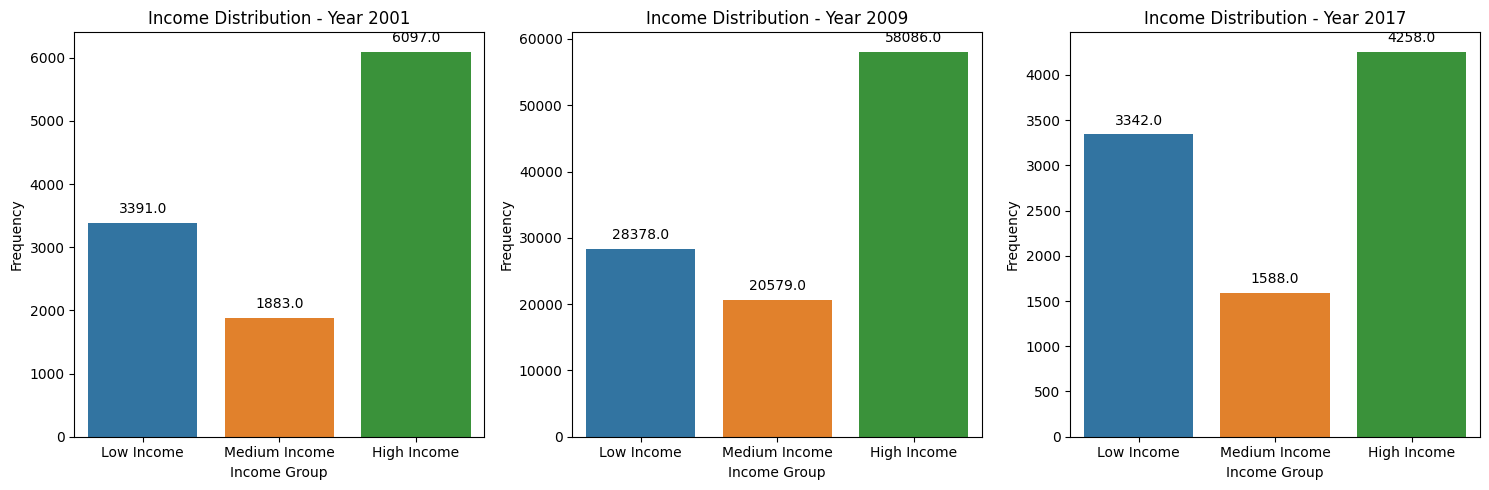

In [53]:
income_labels = {0: 'Low Income', 1: 'Medium Income', 2: 'High Income'}

# Create a list of DataFrames and corresponding years
data_frames = [encoded_2001, encoded_2009, encoded_2017]
years = [2001, 2009, 2017]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(data_frames), figsize=(15, 5))

# Loop through each year's data
for i, (df, year) in enumerate(zip(data_frames, years)):
    # Create a countplot for the HHFAMINC2 column using income_labels
    ax = sns.countplot(x='HHFAMINC2', data=df, ax=axes[i])
    
    # Annotate the bars with count values and income labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Set labels and title
    ax.set_xticklabels([income_labels[label] for label in range(len(income_labels))])
    ax.set_xlabel('Income Group')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Income Distribution - Year {year}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Plot of Income Distribution "After" Over Sampling

In [54]:
def apply_smote_to_datasets(datasets):
    oversampled_data = []
    for df in tqdm(datasets, total=len(datasets)):
        smote = SMOTE(random_state=0)
        X, y = smote.fit_resample(df.drop('HHFAMINC2', axis=1), df['HHFAMINC2'])
        # Create a DataFrame from the oversampled data and concatenate X and y
        df_oversampled = pd.concat([pd.DataFrame(X), pd.Series(y, name='HHFAMINC2')], axis=1)
        oversampled_data.append(df_oversampled)
    return oversampled_data

In [55]:
# List of your encoded datasets: encoded_2001, encoded_2009, encoded_2017
datasets = [encoded_2001, encoded_2009, encoded_2017]

# Apply SMOTE to balance the datasets
oversampled_datasets = apply_smote_to_datasets(datasets)

# Assign each oversampled dataset to separate variables
oversampled_data_2001, oversampled_data_2009, oversampled_data_2017 = oversampled_datasets

  0%|          | 0/3 [00:00<?, ?it/s]

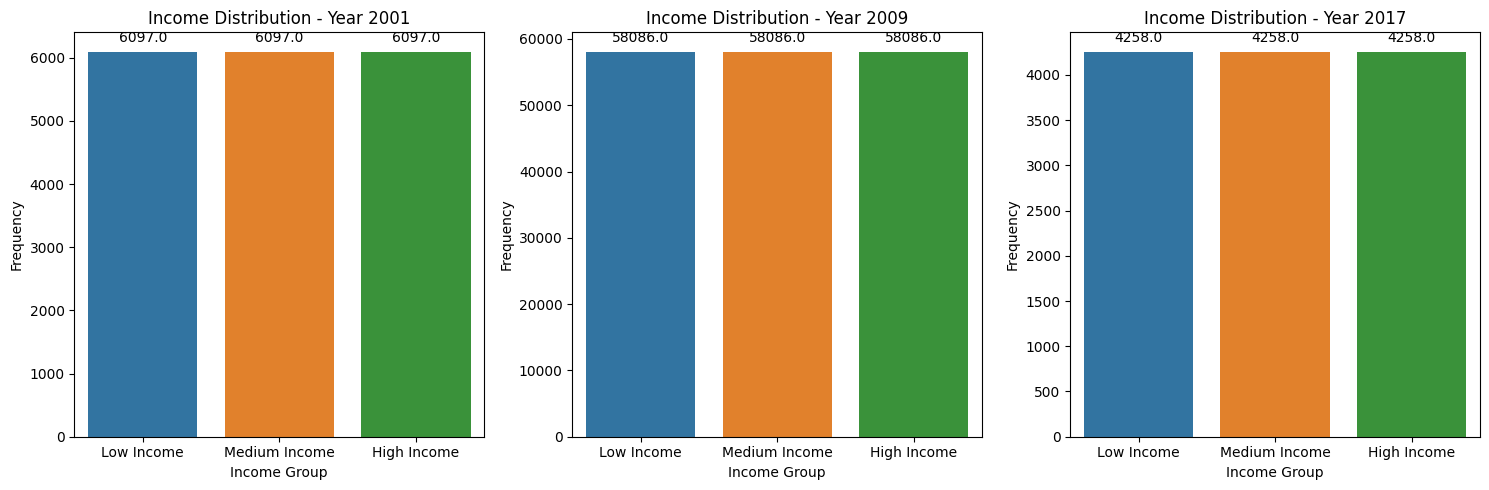

In [56]:
income_labels = {0: 'Low Income', 1: 'Medium Income', 2: 'High Income'}

# Create a list of DataFrames and corresponding years
data_frames = [oversampled_data_2001, oversampled_data_2009, oversampled_data_2017]
years = [2001, 2009, 2017]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(data_frames), figsize=(15, 5))

# Loop through each year's data
for i, (df, year) in enumerate(zip(data_frames, years)):
    # Create a countplot for the HHFAMINC2 column using income_labels
    ax = sns.countplot(x='HHFAMINC2', data=df, ax=axes[i])
    
    # Annotate the bars with count values and income labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Set labels and title
    ax.set_xticklabels([income_labels[label] for label in range(len(income_labels))])
    ax.set_xlabel('Income Group')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Income Distribution - Year {year}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [57]:
# you can use these dataframes after running all the cells for your analysis.

In [58]:
oversampled_data_2001.to_csv('oversampled_data_2001_AllVariables.csv', index=False)
oversampled_data_2009.to_csv('oversampled_data_2009_AllVariables.csv', index=False)
oversampled_data_2017.to_csv('oversampled_data_2017_AllVariables.csv', index=False)